# IMPORT LIBRARIES

In [1797]:
#Import neccessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc, classification_report

# DATA  EXPLORATION

In [1798]:
#Load the dataset
train_set = pd.read_csv("C:\\Users\\Srinu Jaddu\\OneDrive\\Desktop\\BUREAU\\Assignment_Train.csv")

In [1799]:
#Check the columns present in the dataset 
print(train_set.columns)

Index(['DEALER ID', 'APPLICATION LOGIN DATE', 'HDB BRANCH NAME',
       'HDB BRANCH STATE', 'FIRST NAME', 'MIDDLE NAME', 'LAST NAME', 'mobile',
       'AADHAR VERIFIED', 'Cibil Score', 'MOBILE VERIFICATION', 'DEALER NAME',
       'TOTAL ASSET COST', 'ASSET CTG', 'ASSET MODEL NO', 'APPLIED AMOUNT',
       'PRIMARY ASSET MAKE', 'Primary Asset Model No',
       'Personal Email Address', 'MARITAL STATUS', 'GENDER', 'DOB', 'AGE',
       'ADDRESS TYPE', 'EMPLOY CONSTITUTION', 'EMPLOYER NAME', 'EMPLOYER TYPE',
       'Pan Name', 'name', 'vpa', 'upi_name', 'Phone Social Premium.a23games',
       'Phone Social Premium.amazon', 'Phone Social Premium.byjus',
       'Phone Social Premium.flipkart', 'Phone Social Premium.housing',
       'Phone Social Premium.indiamart', 'Phone Social Premium.instagram',
       'Phone Social Premium.isWABusiness',
       'Phone Social Premium.jeevansaathi', 'Phone Social Premium.jiomart',
       'Phone Social Premium.microsoft', 'Phone Social Premium.my11',
       

In [1800]:
#brief description about the data and check for non-missing values 
print(train_set.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   DEALER ID                            10000 non-null  int64  
 1   APPLICATION LOGIN DATE               10000 non-null  object 
 2   HDB BRANCH NAME                      9999 non-null   object 
 3   HDB BRANCH STATE                     9146 non-null   object 
 4   FIRST NAME                           10000 non-null  object 
 5   MIDDLE NAME                          2855 non-null   object 
 6   LAST NAME                            9319 non-null   object 
 7   mobile                               10000 non-null  int64  
 8   AADHAR VERIFIED                      10000 non-null  object 
 9   Cibil Score                          5703 non-null   object 
 10  MOBILE VERIFICATION                  10000 non-null  bool   
 11  DEALER NAME                  

In [1801]:
#print the top 5 rows
print(train_set.head())

   DEALER ID APPLICATION LOGIN DATE HDB BRANCH NAME HDB BRANCH STATE  \
0     106989             07/20/2022        DELHI-SF            DELHI   
1     108975             07/28/2022        PATNA-SF            BIHAR   
2     111004             07/15/2022   DARJEELING-SF      WEST BENGAL   
3     192020             07-04-2022   SAHARANPUR-SF    UTTAR PRADESH   
4      55095             07/15/2022       MODASA-SF          GUJARAT   

  FIRST NAME MIDDLE NAME  LAST NAME      mobile AADHAR VERIFIED Cibil Score  \
0      SUNIL         NaN    CHANDER  9210574080              NO         726   
1      AMRIT         NaN      KUMAR  8877987018              NO         NaN   
2    ANIMESH         NaN      THAPA  8910862135              NO         737   
3     ADITYA         NaN      SINGH  9758428017              NO         713   
4     PARMAR  HARESHBHAI  AMRUTBHAI  9687028486              NO         669   

   ...  Phone Social Premium.shaadi Phone Social Premium.skype  \
0  ...                    

In [1802]:
# Print the top 5 rows of a specific column 
print(train_set['MOBILE VERIFICATION'].head(5))
print(train_set['AADHAR VERIFIED'].head(5))

0    True
1    True
2    True
3    True
4    True
Name: MOBILE VERIFICATION, dtype: bool
0    NO
1    NO
2    NO
3    NO
4    NO
Name: AADHAR VERIFIED, dtype: object


In [1803]:
train_set.shape

(10000, 55)

# DATA PREPROCESSING

In [1804]:
#check the columns which has same value in every row
constant_columns = [col for col in train_set.columns if train_set[col].nunique() == 1]
print("Constant columns:", constant_columns)

Constant columns: ['AADHAR VERIFIED', 'MOBILE VERIFICATION', 'Phone Social Premium.a23games', 'Phone Social Premium.my11', 'Phone Social Premium.rummycircle', 'Phone Social Premium.yatra']


In [1805]:
#As the  column contains same value in every row remove those columns
train_set = train_set.drop(columns=constant_columns)

In [1806]:
#shape after removing the constant columns
train_set.shape,test_set.shape

((10000, 49), (2000, 11))

In [1807]:
# Drop columns with high missing values
missing_cols = train_set.columns[train_set.isnull().mean() > 0.5]
train_set = train_set.drop(columns=missing_cols)

#drop columns in test set
missing_cols = test_set.columns[test_set.isnull().mean() > 0.5]


In [1808]:
# List of columns to drop as these do not significantly affect approval
columns_to_drop = [
    'mobile',
    'Personal Email Address',
    'GENDER',
    'Pan Name',
    'name',
    'DEALER ID',
    'upi_name',
    'vpa',
    'DOB',
    'APPLICATION LOGIN DATE',
    'HDB BRANCH NAME',
    'FIRST NAME',
    'LAST NAME',
    'DEALER NAME',
    'Primary Asset Model No',
    'Phone Social Premium.amazon',
    'Phone Social Premium.byjus',
    'Phone Social Premium.flipkart',
    'Phone Social Premium.housing',
    'Phone Social Premium.indiamart',
    'Phone Social Premium.jeevansaathi',
    'Phone Social Premium.microsoft',
    'Phone Social Premium.paytm',
    'Phone Social Premium.shaadi',
    'Phone Social Premium.skype',
    'Phone Social Premium.toi',
    'Phone Social Premium.zoho',
    'phone_digitalage',
    'phone_nameMatchScore',
    'phone_phoneFootprintStrengthOverall'
]

# Drop the columns from the DataFrame
train_set = train_set.drop(columns=columns_to_drop)
# Check the updated DataFrame
print(train_set.head())

  HDB BRANCH STATE Cibil Score  ASSET MODEL NO  APPLIED AMOUNT  \
0            DELHI         726          139542           85000   
1            BIHAR         NaN          140208           90000   
2      WEST BENGAL         737          160001           75000   
3    UTTAR PRADESH         713          160832           78500   
4          GUJARAT         669          174641           70000   

  PRIMARY ASSET MAKE MARITAL STATUS  AGE       ADDRESS TYPE  \
0       HONDA MOTORS        Married   44           Parental   
1        HERO MOTORS            NaN   25                NaN   
2       TVS MOTOR CO         Single   22  Self/Spouse Owned   
3        HERO MOTORS         Single   24           Parental   
4       HONDA MOTORS            NaN   33                NaN   

  EMPLOY CONSTITUTION  EMPLOYER TYPE Application Status  
0            SALARIED       SALARIED           APPROVED  
1                 NaN            NaN           APPROVED  
2       SELF-EMPLOYED  SELF-EMPLOYED           APP

In [1809]:
# Check the updated DataFrame shape
print(train_set.shape)

(10000, 11)


In [1810]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   HDB BRANCH STATE     9146 non-null   object
 1   Cibil Score          5703 non-null   object
 2   ASSET MODEL NO       10000 non-null  int64 
 3   APPLIED AMOUNT       10000 non-null  int64 
 4   PRIMARY ASSET MAKE   10000 non-null  object
 5   MARITAL STATUS       5106 non-null   object
 6   AGE                  10000 non-null  int64 
 7   ADDRESS TYPE         6688 non-null   object
 8   EMPLOY CONSTITUTION  5002 non-null   object
 9   EMPLOYER TYPE        5002 non-null   object
 10  Application Status   10000 non-null  object
dtypes: int64(3), object(8)
memory usage: 859.5+ KB


In [1811]:
#Print top 5 Rows
train_set.head(5)

,HDB BRANCH STATE,Cibil Score,ASSET MODEL NO,APPLIED AMOUNT,PRIMARY ASSET MAKE,MARITAL STATUS,AGE,ADDRESS TYPE,EMPLOY CONSTITUTION,EMPLOYER TYPE,Application Status
0,DELHI,726,139542,85000,HONDA MOTORS,Married,44,Parental,SALARIED,SALARIED,APPROVED
1,BIHAR,NaN,140208,90000,HERO MOTORS,NaN,25,NaN,NaN,NaN,APPROVED
2,WEST BENGAL,737,160001,75000,TVS MOTOR CO,Single,22,Self/Spouse Owned,SELF-EMPLOYED,SELF-EMPLOYED,APPROVED
3,UTTAR PRADESH,713,160832,78500,HERO MOTORS,Single,24,Parental,SELF-EMPLOYED,SELF-EMPLOYED,APPROVED
4,GUJARAT,669,174641,70000,HONDA MOTORS,NaN,33,NaN,NaN,NaN,DECLINED


In [1812]:
#checking whether these columns are same or not?
are_same = train_set['EMPLOY CONSTITUTION'].equals(train_set['EMPLOYER TYPE'])
print(f"Are the columns exactly the same? {are_same}")

Are the columns exactly the same? False


In [1813]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   HDB BRANCH STATE     9146 non-null   object
 1   Cibil Score          5703 non-null   object
 2   ASSET MODEL NO       10000 non-null  int64 
 3   APPLIED AMOUNT       10000 non-null  int64 
 4   PRIMARY ASSET MAKE   10000 non-null  object
 5   MARITAL STATUS       5106 non-null   object
 6   AGE                  10000 non-null  int64 
 7   ADDRESS TYPE         6688 non-null   object
 8   EMPLOY CONSTITUTION  5002 non-null   object
 9   EMPLOYER TYPE        5002 non-null   object
 10  Application Status   10000 non-null  object
dtypes: int64(3), object(8)
memory usage: 859.5+ KB


In [1814]:
#identify missing values
missing_values = train_set.isnull().sum()
print(missing_values)

HDB BRANCH STATE        854
Cibil Score            4297
ASSET MODEL NO            0
APPLIED AMOUNT            0
PRIMARY ASSET MAKE        0
MARITAL STATUS         4894
AGE                       0
ADDRESS TYPE           3312
EMPLOY CONSTITUTION    4998
EMPLOYER TYPE          4998
Application Status        0
dtype: int64


In [1815]:
# Impute categorical columns
# For 'HDB BRANCH STATE'
train_set['HDB BRANCH STATE'] = train_set['HDB BRANCH STATE'].fillna('Unknown')

# For 'PRIMARY ASSET MAKE'
train_set['PRIMARY ASSET MAKE'] = train_set['PRIMARY ASSET MAKE'].fillna('Unknown')

#For 'ADDRESS TYPE'
train_set['ADDRESS TYPE'] = train_set['ADDRESS TYPE'].fillna('Unknown')

# For 'MARITAL STATUS'
train_set['MARITAL STATUS'] = train_set['MARITAL STATUS'].fillna('Unknown')

# For 'EMPLOYER TYPE'
train_set['EMPLOYER TYPE'] = train_set['EMPLOYER TYPE'].fillna('Unknown')

# For 'EMPLOY CONSTITUTION'
train_set['EMPLOY CONSTITUTION'] = train_set['EMPLOY CONSTITUTION'].fillna('Unknown')


# Replace non-numeric values with NaN
train_set['Cibil Score'] = pd.to_numeric(train_set['Cibil Score'],errors='coerce')

# Apply KNNImputer
imputer = KNNImputer(n_neighbors=5)
train_set[['Cibil Score']] = imputer.fit_transform(train_set[['Cibil Score']])


In [1816]:
#final dataset after removing all unneccassary columns
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   HDB BRANCH STATE     10000 non-null  object 
 1   Cibil Score          10000 non-null  float64
 2   ASSET MODEL NO       10000 non-null  int64  
 3   APPLIED AMOUNT       10000 non-null  int64  
 4   PRIMARY ASSET MAKE   10000 non-null  object 
 5   MARITAL STATUS       10000 non-null  object 
 6   AGE                  10000 non-null  int64  
 7   ADDRESS TYPE         10000 non-null  object 
 8   EMPLOY CONSTITUTION  10000 non-null  object 
 9   EMPLOYER TYPE        10000 non-null  object 
 10  Application Status   10000 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 859.5+ KB


In [1817]:
# Map 'Application Status' to 1 for 'Approved' and 0 for 'Rejected'
status_mapping = {'APPROVED': 1, 'DECLINED': 0}
train_set['Application Status'] = train_set['Application Status'].map(status_mapping)

print(train_set.head())

  HDB BRANCH STATE  Cibil Score  ASSET MODEL NO  APPLIED AMOUNT  \
0            DELHI   726.000000          139542           85000   
1            BIHAR   706.402118          140208           90000   
2      WEST BENGAL   737.000000          160001           75000   
3    UTTAR PRADESH   713.000000          160832           78500   
4          GUJARAT   669.000000          174641           70000   

  PRIMARY ASSET MAKE MARITAL STATUS  AGE       ADDRESS TYPE  \
0       HONDA MOTORS        Married   44           Parental   
1        HERO MOTORS        Unknown   25            Unknown   
2       TVS MOTOR CO         Single   22  Self/Spouse Owned   
3        HERO MOTORS         Single   24           Parental   
4       HONDA MOTORS        Unknown   33            Unknown   

  EMPLOY CONSTITUTION  EMPLOYER TYPE  Application Status  
0            SALARIED       SALARIED                   1  
1             Unknown        Unknown                   1  
2       SELF-EMPLOYED  SELF-EMPLOYED     

In [1818]:
# Initialize LabelEncoder
le = LabelEncoder()

# Apply label encoding to categorical columns
train_set['ADDRESS TYPE'] = le.fit_transform(train_set['ADDRESS TYPE'])
train_set['EMPLOY CONSTITUTION'] = le.fit_transform(train_set['EMPLOY CONSTITUTION'])
train_set['EMPLOYER TYPE'] = le.fit_transform(train_set['EMPLOYER TYPE'])
train_set['HDB BRANCH STATE'] = le.fit_transform(train_set['HDB BRANCH STATE'])
train_set['MARITAL STATUS'] = le.fit_transform(train_set['MARITAL STATUS'])
train_set['PRIMARY ASSET MAKE'] = le.fit_transform(train_set['PRIMARY ASSET MAKE'])
print(train_set.head())

   HDB BRANCH STATE  Cibil Score  ASSET MODEL NO  APPLIED AMOUNT  \
0                 4   726.000000          139542           85000   
1                 2   706.402118          140208           90000   
2                24   737.000000          160001           75000   
3                21   713.000000          160832           78500   
4                 5   669.000000          174641           70000   

   PRIMARY ASSET MAKE  MARITAL STATUS  AGE  ADDRESS TYPE  EMPLOY CONSTITUTION  \
0                   7               0   44             7                    0   
1                   6               2   25            12                    2   
2                  15               1   22            11                    1   
3                   6               1   24             7                    1   
4                   7               2   33            12                    2   

   EMPLOYER TYPE  Application Status  
0              2                   1  
1              4          

In [1819]:
train_set.shape

(10000, 11)

In [1820]:
# Prepare the data
X = train_set.drop(columns=['Application Status']) 
y = train_set['Application Status']
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# DATA VISUALISATION

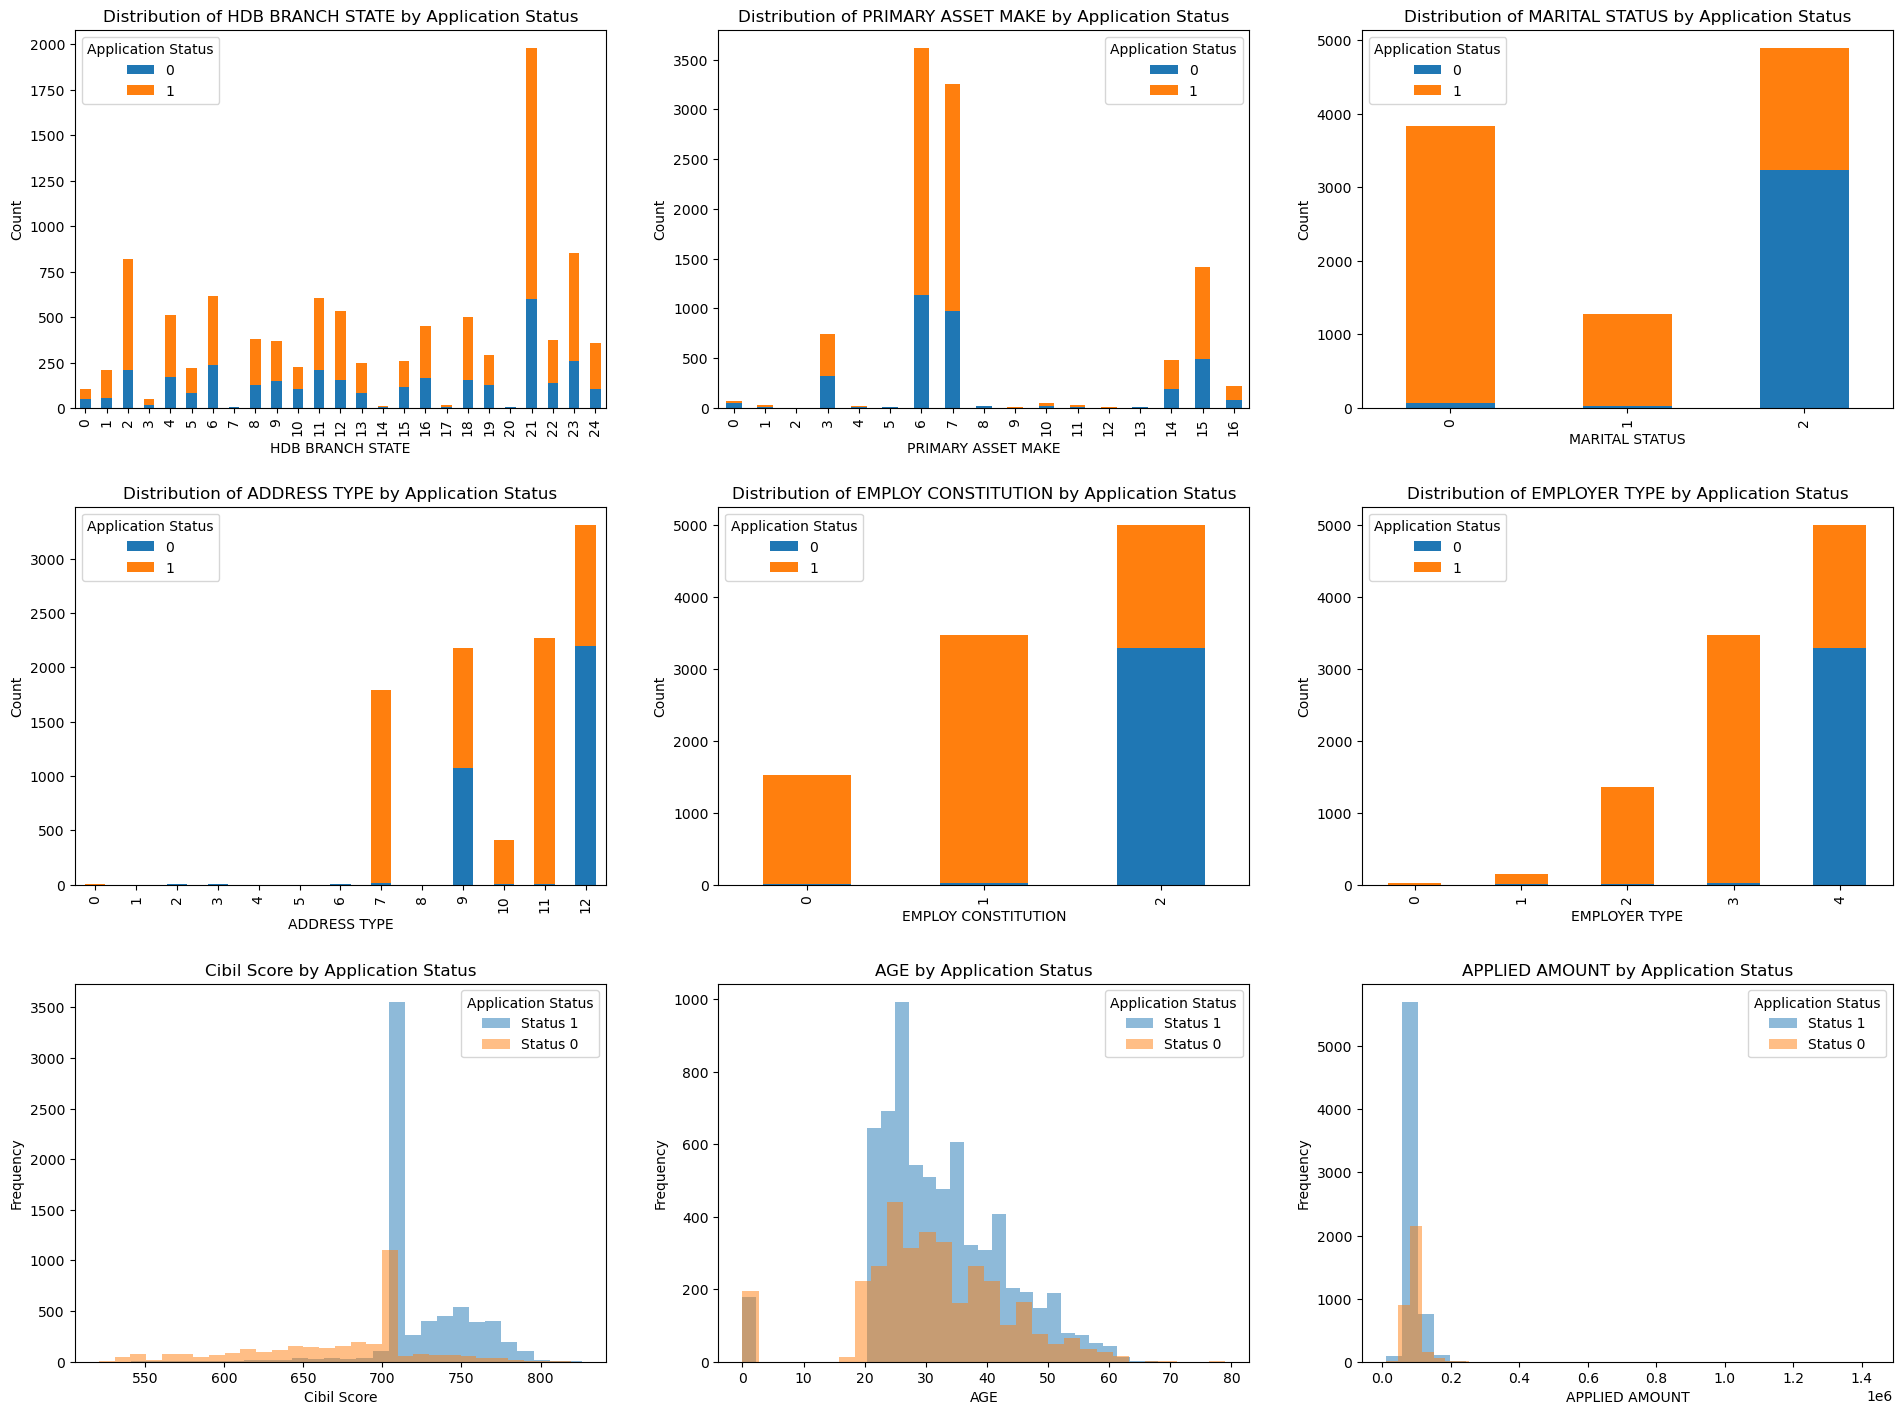

In [1821]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
fig.tight_layout(pad=5.0)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Categorical variables
categorical_vars = ['HDB BRANCH STATE', 'PRIMARY ASSET MAKE', 'MARITAL STATUS', 'ADDRESS TYPE', 'EMPLOY CONSTITUTION', 'EMPLOYER TYPE']
for i, var in enumerate(categorical_vars):
    # Plot the distribution of categories by Application Status
    train_set.groupby([var, 'Application Status']).size().unstack().plot(kind='bar', stacked=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {var} by Application Status')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Application Status')

# Numerical variables
numerical_vars = ['Cibil Score', 'AGE', 'APPLIED AMOUNT']
for i, var in enumerate(numerical_vars):
    # Plot histograms for each Application Status
    for status in train_set['Application Status'].unique():
        train_set[train_set['Application Status'] == status][var].dropna().plot(kind='hist', bins=30, alpha=0.5, ax=axes[len(categorical_vars) + i], label=f'Status {status}')
    axes[len(categorical_vars) + i].set_title(f'{var} by Application Status')
    axes[len(categorical_vars) + i].set_xlabel(var)
    axes[len(categorical_vars) + i].set_ylabel('Frequency')
    axes[len(categorical_vars) + i].legend(title='Application Status')

# Remove any empty subplots
for j in range(len(categorical_vars) + len(numerical_vars), len(axes)):
    fig.delaxes(axes[j])

plt.show()

C:\Users\Srinu Jaddu\Downloads\Downloads\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


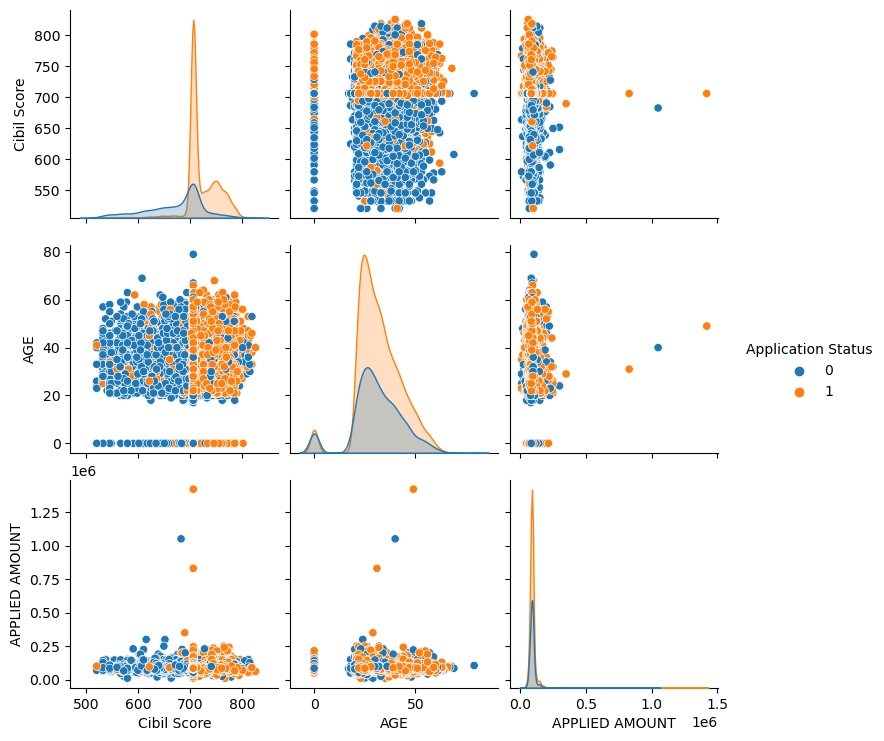

In [1822]:
# Select numerical columns for pair plot
numerical_vars = ['Cibil Score', 'AGE', 'APPLIED AMOUNT']

# Add the target variable to the dataframe
df_pairplot = train_set[numerical_vars + ['Application Status']]

# Plot pair plot
sns.pairplot(df_pairplot, hue='Application Status')
plt.show()

# MODEL BUILDING

In [1823]:
# Initialize the RandomForest model
rf = RandomForestClassifier(random_state=42)

# Train the RandomForest model
rf.fit(X_train, y_train)

# Make predictions with the RandomForest model
y_pred_rf = rf.predict(X_test)


# MODEL EVALUATION METRICS

In [1824]:
# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy : {accuracy_rf}")


# Precision
precision_rf = precision_score(y_test, y_pred_rf, average='binary')
print(f"Precision: {precision_rf}")

# Recall
recall_rf = recall_score(y_test, y_pred_rf, average='binary')
print(f"Recall: {recall_rf}")

# F1 Score
f1_rf = f1_score(y_test, y_pred_rf, average='binary')
print(f"F1-Score: {f1_rf}")


Accuracy : 0.872
Precision: 0.8997518610421836
Recall: 0.9087719298245615
F1-Score: 0.9042394014962594


# PREDICTIONS ON TEST DATA


In [1825]:
# Define the custom columns you want to load
custom_columns = ['UID','HDB BRANCH STATE', 'Cibil Score', 'ASSET MODEL NO', 
                  'APPLIED AMOUNT', 'PRIMARY ASSET MAKE', 'MARITAL STATUS', 
                  'AGE', 'ADDRESS TYPE', 'EMPLOY CONSTITUTION', 
                  'EMPLOYER TYPE']

# Load only the custom columns from the CSV file
file_path= "C:\\Users\\Srinu Jaddu\\OneDrive\\Desktop\\BUREAU\\Assignment_Test.csv"
test_set = pd.read_csv(file_path, usecols=custom_columns)

# Check the first few rows of the loaded data
print(test_set.head())

                   UID HDB BRANCH STATE Cibil Score  ASSET MODEL NO  \
0  1844045271814558464              NaN         757          143241   
1  1840349097823778816   MADHYA PRADESH         750          166536   
2  1488102613362294272    UTTAR PRADESH         710          134123   
3   555529923942874624           KERALA         695          143627   
4  1010213070486150912           ORISSA         NaN          143948   

   APPLIED AMOUNT PRIMARY ASSET MAKE MARITAL STATUS  AGE       ADDRESS TYPE  \
0           88000       HONDA MOTORS        Married   56  Self/Spouse Owned   
1           75000       TVS MOTOR CO        Married   42           Parental   
2           93000       HONDA MOTORS         Single   25  Self/Spouse Owned   
3           95000       YAMAHA MOTOR            NaN   34                NaN   
4           83000        HERO MOTORS         Single   24           Parental   

  EMPLOY CONSTITUTION  EMPLOYER TYPE  
0            SALARIED       SALARIED  
1       SELF-EMPLOYE

In [1826]:
# Impute categorical columns
# For 'HDB BRANCH STATE'
test_set['HDB BRANCH STATE'] = test_set['HDB BRANCH STATE'].fillna('Unknown')

# For 'PRIMARY ASSET MAKE'
test_set['PRIMARY ASSET MAKE'] = test_set['PRIMARY ASSET MAKE'].fillna('Unknown')

#For 'ADDRESS TYPE'
test_set['ADDRESS TYPE'] = test_set['ADDRESS TYPE'].fillna('Unknown')

# For 'MARITAL STATUS'
test_set['MARITAL STATUS'] = test_set['MARITAL STATUS'].fillna('Unknown')

# For 'EMPLOYER TYPE'
test_set['EMPLOYER TYPE'] = test_set['EMPLOYER TYPE'].fillna('Unknown')

# For 'EMPLOY CONSTITUTION'
test_set['EMPLOY CONSTITUTION'] = test_set['EMPLOY CONSTITUTION'].fillna('Unknown')

# Replace non-numeric values with NaN in 'Cibil Score'
test_set['Cibil Score'] = pd.to_numeric(test_set['Cibil Score'], errors='coerce')

# Apply KNNImputer
imputer = KNNImputer(n_neighbors=5)
test_set[['Cibil Score']] = imputer.fit_transform(test_set[['Cibil Score']])

# Check the updated dataset
print(test_set.head())

                   UID HDB BRANCH STATE  Cibil Score  ASSET MODEL NO  \
0  1844045271814558464          Unknown   757.000000          143241   
1  1840349097823778816   MADHYA PRADESH   750.000000          166536   
2  1488102613362294272    UTTAR PRADESH   710.000000          134123   
3   555529923942874624           KERALA   695.000000          143627   
4  1010213070486150912           ORISSA   706.444541          143948   

   APPLIED AMOUNT PRIMARY ASSET MAKE MARITAL STATUS  AGE       ADDRESS TYPE  \
0           88000       HONDA MOTORS        Married   56  Self/Spouse Owned   
1           75000       TVS MOTOR CO        Married   42           Parental   
2           93000       HONDA MOTORS         Single   25  Self/Spouse Owned   
3           95000       YAMAHA MOTOR        Unknown   34            Unknown   
4           83000        HERO MOTORS         Single   24           Parental   

  EMPLOY CONSTITUTION  EMPLOYER TYPE  
0            SALARIED       SALARIED  
1       SELF-E

In [1827]:
# Initialize LabelEncoder
le = LabelEncoder()
# Apply label encoding to categorical columns in test_set
test_set['ADDRESS TYPE'] = le.fit_transform(test_set['ADDRESS TYPE'])
test_set['EMPLOY CONSTITUTION'] = le.fit_transform(test_set['EMPLOY CONSTITUTION'])
test_set['EMPLOYER TYPE'] = le.fit_transform(test_set['EMPLOYER TYPE'])
test_set['HDB BRANCH STATE'] = le.fit_transform(test_set['HDB BRANCH STATE'])
test_set['MARITAL STATUS'] = le.fit_transform(test_set['MARITAL STATUS'])
test_set['PRIMARY ASSET MAKE'] = le.fit_transform(test_set['PRIMARY ASSET MAKE'])

# Check the updated dataset
print(test_set.head())

                   UID  HDB BRANCH STATE  Cibil Score  ASSET MODEL NO  \
0  1844045271814558464                23   757.000000          143241   
1  1840349097823778816                11   750.000000          166536   
2  1488102613362294272                21   710.000000          134123   
3   555529923942874624                10   695.000000          143627   
4  1010213070486150912                13   706.444541          143948   

   APPLIED AMOUNT  PRIMARY ASSET MAKE  MARITAL STATUS  AGE  ADDRESS TYPE  \
0           88000                   6               0   56             6   
1           75000                  14               0   42             3   
2           93000                   6               1   25             6   
3           95000                  15               2   34             7   
4           83000                   5               1   24             3   

   EMPLOY CONSTITUTION  EMPLOYER TYPE  
0                    0              2  
1                    1  

In [1828]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   UID                  2000 non-null   int64  
 1   HDB BRANCH STATE     2000 non-null   int32  
 2   Cibil Score          2000 non-null   float64
 3   ASSET MODEL NO       2000 non-null   int64  
 4   APPLIED AMOUNT       2000 non-null   int64  
 5   PRIMARY ASSET MAKE   2000 non-null   int32  
 6   MARITAL STATUS       2000 non-null   int32  
 7   AGE                  2000 non-null   int64  
 8   ADDRESS TYPE         2000 non-null   int32  
 9   EMPLOY CONSTITUTION  2000 non-null   int32  
 10  EMPLOYER TYPE        2000 non-null   int32  
dtypes: float64(1), int32(6), int64(4)
memory usage: 125.1 KB


In [1829]:
X_test_final = pd.DataFrame({
    'HDB BRANCH STATE': test_set['HDB BRANCH STATE'],
    'Cibil Score': test_set['Cibil Score'],
    'ASSET MODEL NO': test_set['ASSET MODEL NO'],
    'APPLIED AMOUNT': test_set['APPLIED AMOUNT'],
    'PRIMARY ASSET MAKE': test_set['PRIMARY ASSET MAKE'],
    'MARITAL STATUS': test_set['MARITAL STATUS'],
    'AGE': test_set['AGE'],
    'ADDRESS TYPE': test_set['ADDRESS TYPE'],
    'EMPLOY CONSTITUTION': test_set['EMPLOY CONSTITUTION'],
    'EMPLOYER TYPE': test_set['EMPLOYER TYPE']
})

In [1830]:
#Use the trained RandomForest model to make predictions
y_pred_test = rf.predict(X_test_final)

In [1831]:
#map the output to actual output
prediction_mapping = {1: 'APPROVED', 0: 'DECLINED'}
y_pred_mapped = [prediction_mapping[pred] for pred in y_pred_test]

In [1832]:
# Create a DataFrame for UID and Prediction
results_df = pd.DataFrame({
    'UID': test_set['UID'],   # Ensure UID column exists in test set
    'Prediction': y_pred_mapped
})

In [1833]:
#Save the predictions to an Excel file
results_df.to_excel("C:\\Users\\Srinu Jaddu\\OneDrive\\Desktop\\BUREAU\\test_prediction.xlsx", index=False)
print("Mapped predictions saved to 'test_prediction.xlsx'")

Mapped predictions saved to 'test_prediction.xlsx'
